In [1]:
# Import required dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1(np.linspace(0, 1, 10)))

In [2]:
trace_df = pd.read_csv("../traces/generated_trace_pdf.csv")
true_throughput_df = pd.read_csv("../data/scratch/true_throughput.csv")
model_throughput_df = pd.read_csv("../data/scratch/model_throughput.csv")
bin_width = model_throughput_df["Sequence"][1] - model_throughput_df["Sequence"][0]

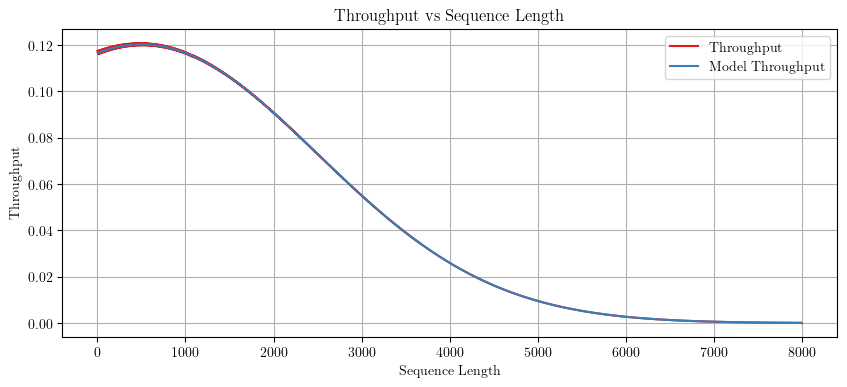

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(true_throughput_df["Sequence"], true_throughput_df["Throughput"], label="Throughput")
plt.plot(model_throughput_df["Sequence"], model_throughput_df["Throughput"] / bin_width, label="Model Throughput")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput")
plt.title("Throughput vs Sequence Length")
plt.legend()
plt.grid()
plt.show()

Length of model throughput dataframe: 8000
Length of true throughput dataframe: 8001


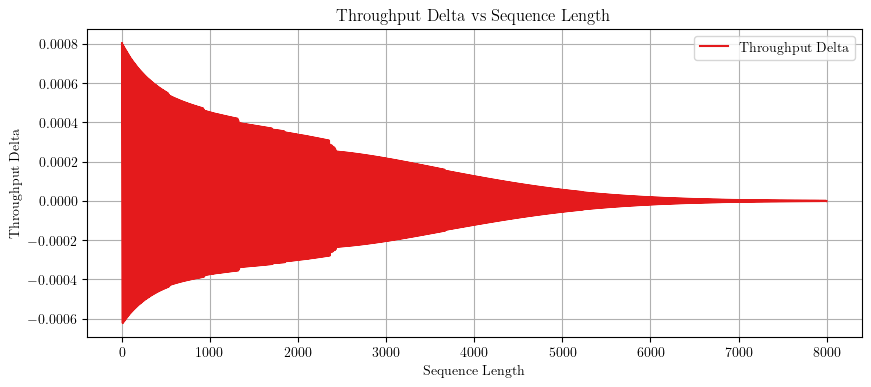

In [4]:
# Interpolate the model throughput values for the missing sequence lengths
model_throughput_df["seq_range"] = model_throughput_df["Sequence"].apply(lambda mid: list(range(mid - bin_width // 2, mid + bin_width // 2)))
model_throughput_df_expanded = model_throughput_df.explode("seq_range").rename(columns={"seq_range": "SequenceMid"})
model_throughput_df_expanded["Throughput"] = model_throughput_df_expanded["Throughput"] / bin_width
model_throughput_df_expanded = model_throughput_df_expanded[["SequenceMid", "Throughput"]]

# print the length of the model throughput dataframe
print(f"Length of model throughput dataframe: {len(model_throughput_df_expanded["Throughput"])}")
print(f"Length of true throughput dataframe: {len(true_throughput_df["Throughput"])}")

# calculate the delta between the two dataframes (using numpy arrays)
throughput_array = true_throughput_df["Throughput"].to_numpy()
model_throughput_array = model_throughput_df_expanded["Throughput"].to_numpy()

# Ensure both arrays have the same shape by truncating the longer array
min_length = min(len(throughput_array), len(model_throughput_array))
throughput_array = throughput_array[:min_length]
model_throughput_array = model_throughput_array[:min_length]

# Calculate the delta
throughput_delta_array = throughput_array - model_throughput_array

# plot the delta between the two dataframes
plt.figure(figsize=(10, 4))
plt.plot(model_throughput_df_expanded["SequenceMid"], throughput_delta_array, label="Throughput Delta")
plt.xlabel("Sequence Length")
plt.ylabel("Throughput Delta")
plt.title("Throughput Delta vs Sequence Length")
plt.legend()
plt.grid()
plt.show()

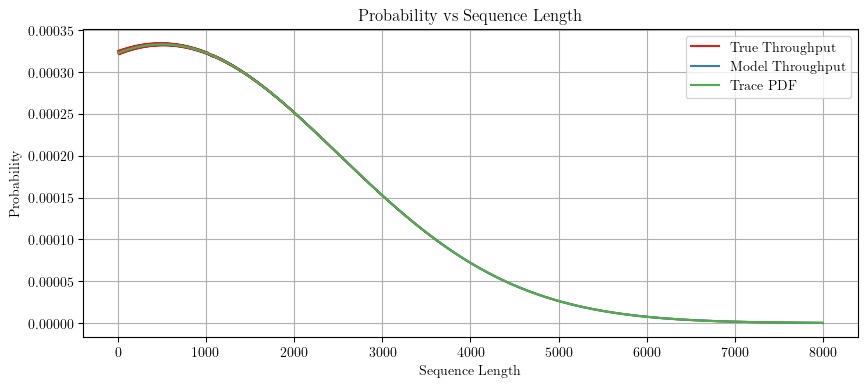

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(true_throughput_df["Sequence"], true_throughput_df["Throughput"] / true_throughput_df["Throughput"].sum(), label="True Throughput")
plt.plot(model_throughput_df["Sequence"], model_throughput_df["Throughput"] / model_throughput_df["Throughput"].sum() / bin_width, label="Model Throughput")
plt.plot(trace_df["Length"], trace_df["Probability"], label="Trace PDF")
plt.xlabel("Sequence Length")
plt.ylabel("Probability")
plt.title("Probability vs Sequence Length")
plt.legend()
plt.grid()
plt.show()

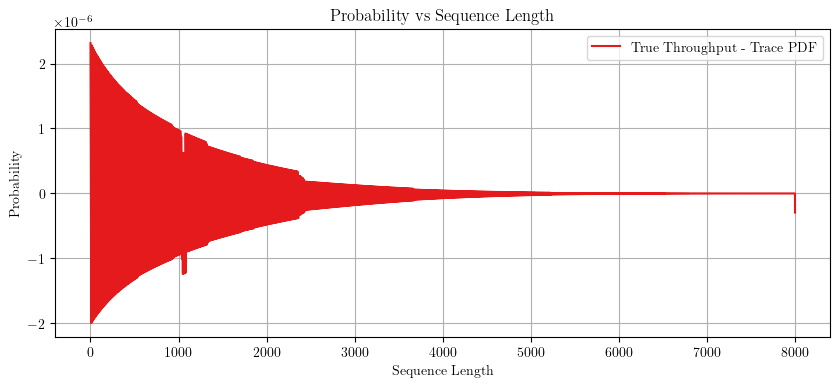

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(true_throughput_df["Sequence"], (true_throughput_df["Throughput"] / true_throughput_df["Throughput"].sum()) - trace_df["Probability"], label="True Throughput - Trace PDF")
plt.xlabel("Sequence Length")
plt.ylabel("Probability")
plt.title("Probability vs Sequence Length")
plt.legend()
plt.grid()
plt.show()
